<a href="https://colab.research.google.com/github/PaulNjinu254/Home-Price-Forecast/blob/main/Home_Price_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train (2).csv


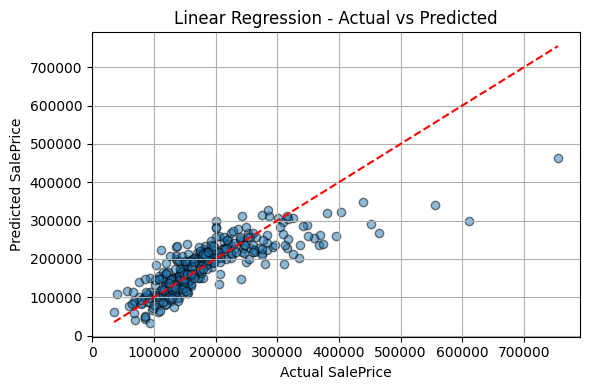

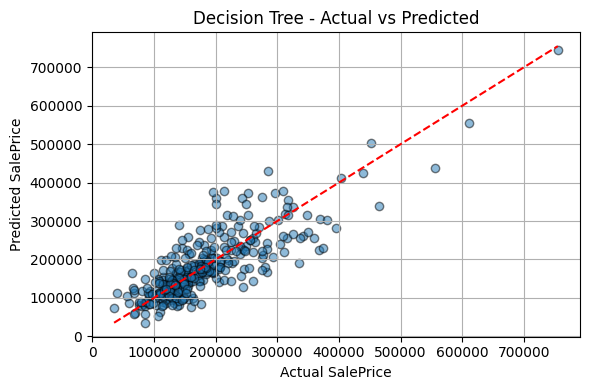

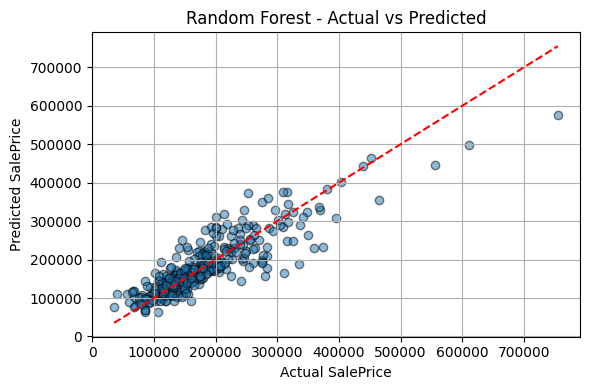

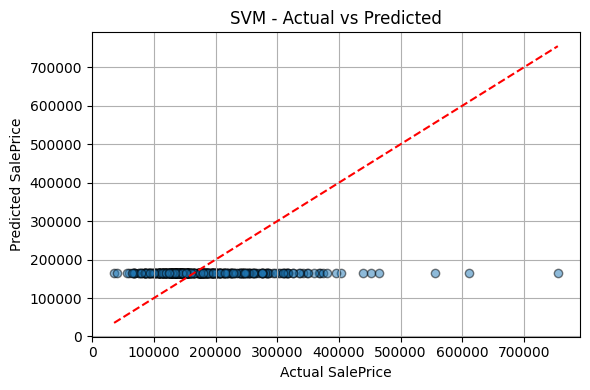

Mean Squared Error (MSE) for each model:
Linear Regression: 2.31e+09
Decision Tree: 2.37e+09
Random Forest: 1.64e+09
SVM: 7.17e+09


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from google.colab import files

uploaded = files.upload()

# Load data
df = pd.read_csv('train.csv')

# Select features and target
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVM': SVR()
}

# Store results
mse_results = {}

# Train, predict, evaluate, and visualize
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse

    # Visualization
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual SalePrice')
    plt.ylabel('Predicted SalePrice')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display MSE results
print("Mean Squared Error (MSE) for each model:")
for name, mse in mse_results.items():
    print(f"{name}: {mse:.2e}")
